---
title: "First steps with Dynare and moment matching."
subtitle: "Business Cycles and Fluctuations - AE2E6"
format:
    ipynb:
        output_file: problem_correction.ipynb

    html:
        output-file: problem_correction.html
resources:
    - "*.mod"
listing:
    id: mod-listings
    contents:
        - "*.mod"
    fields: [filename]

---

::: {.callout-note collapse="true" title="Objectives"}

Using Dynare:

- get familiar with the structure of a modfile
- interpret results
    - compare moments with the data
- edit a model
    - fix steady-state
    - extend a model (in particular recheck/rederive first order conditions)

::: 

::: {.callout-tip title="Modfiles" collapse="true"}

:::: {#mod-listings}
::::

:::

Uncomment the following lines to install needed packages (if not already present).

In [1]:
# uncomment the next lines, the first time you run
# import Pkg; Pkg.add(["DBnomics", "Dynare", "DataFrames"])
# import Pkg; Pkg.add(url="https://github.com/sdBrinkmann/HPFilter.jl") # we install hpfilter from github

# Using Dynare

Download the [rbc](rbc.mod) modfile.

In [2]:
using Dynare

__Open the RBC model and solve the model. Fix the mistakes in the modfile if any.__ 

In [5]:
context = @dynare "rbc.mod";
# ; mutes the output
# graphs and other outputs are stored in subdirectory `rbc`
# the structure `context contains all the results.`

Dynare version: 0.9.10
2024-04-12T11:45:17.545: Starting @dynare rbc.mod
["rbc.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2024-04-12T11:45:17.550: End of preprocessing
2024-04-12T11:45:17.553: Start parse_statements!
2024-04-12T11:45:17.558: End parse_statements!
2024-04-12T11:45:17.558: End parser


Starting preprocessing of the model file ...
Found 8 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 5 feedback variable(s).
Computing dynamic model derivatives (order 2).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 5 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.

longname: c
texname: c
symboltype: Endogenous
orderintype: 6
longname: r
texname: r
symboltype: Endogenous
orderintype: 7
longname: khi
texname: khi
symboltype: Parameter
orderintype: 5
longname: a


Context(Dict{String, DynareSymbol}("c" => , "r" => , "khi" => , "a" => , "delta" => , "nss" => , "y" => , "i" => , "w" => , "k" => …), Model[], , Results(ModelResults[]), , Dict{Any, Any}())

(if needed, download the correct model [here](rbc_fixed.mod) )

__Inspect the various elements of the solution (decision rule, unconditional moments, simulations).__

__Interpret the effect of a productivity shock. How does it depend on the productivity?__

__Bonus: open the same model with Dyno (see link on the course webpage). Compare the results.__

# Computing moments in the data

__Download US time series from the world bank for: real gdp, investment, consumption, hours worked.__

In [9]:
using Plots
using DBnomics
using DataFrames
using HPFilter: HP
using Statistics: cor, std

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [10]:
# google OECD
df_ = rdb(ids = [
    "OECD/QNA/USA.P5.LNBQRSA.Q", # investment
    "OECD/QNA/USA.B1_GS1.LNBQRSA.Q", # GDP
    "OECD/QNA/USA.P3.LNBQRSA.Q"

]);

In [11]:
# keep only the relevant data, in long format
df_long = df_[!,["Subject","period","value"]]

Row,Subject,period,value
,String,Date,Float64
1,Gross capital formation,1970-01-01,2.15688e5
2,Gross capital formation,1970-04-01,2.14743e5
3,Gross capital formation,1970-07-01,217739.0
4,Gross capital formation,1970-10-01,2.08844e5
5,Gross capital formation,1971-01-01,2.23069e5
6,Gross capital formation,1971-04-01,2.27366e5
7,Gross capital formation,1971-07-01,2.29696e5
8,Gross capital formation,1971-10-01,2.23591e5
9,Gross capital formation,1972-01-01,2.34297e5


In [12]:
df = unstack(df_long,:period, :Subject,:value);

In [13]:
df = dropmissing(sort(df))

Row,period,Gross capital formation,Gross domestic product,Final consumption expenditure
,Date,Float64,Float64,Float64
1,1970-01-01,2.15688e5,1.32516e6,1.13697e6
2,1970-04-01,2.14743e5,1.32704e6,1.13882e6
3,1970-07-01,217739.0,1.33927e6,1.14738e6
4,1970-10-01,2.08844e5,1.32492e6,1.14562e6
5,1971-01-01,2.23069e5,1.3609e6,1.1627e6
6,1971-04-01,2.27366e5,1.36826e6,1.17093e6
7,1971-07-01,2.29696e5,1.37952e6,1.17765e6
8,1971-10-01,2.23591e5,1.38276e6,1.19219e6
9,1972-01-01,2.34297e5,1.40816e6,1.2072e6


In [14]:
rename!(df,[:period, :investment, :gdp, :consumption])

Row,period,investment,gdp,consumption
,Date,Float64,Float64,Float64
1,1970-01-01,2.15688e5,1.32516e6,1.13697e6
2,1970-04-01,2.14743e5,1.32704e6,1.13882e6
3,1970-07-01,217739.0,1.33927e6,1.14738e6
4,1970-10-01,2.08844e5,1.32492e6,1.14562e6
5,1971-01-01,2.23069e5,1.3609e6,1.1627e6
6,1971-04-01,2.27366e5,1.36826e6,1.17093e6
7,1971-07-01,2.29696e5,1.37952e6,1.17765e6
8,1971-10-01,2.23591e5,1.38276e6,1.19219e6
9,1972-01-01,2.34297e5,1.40816e6,1.2072e6


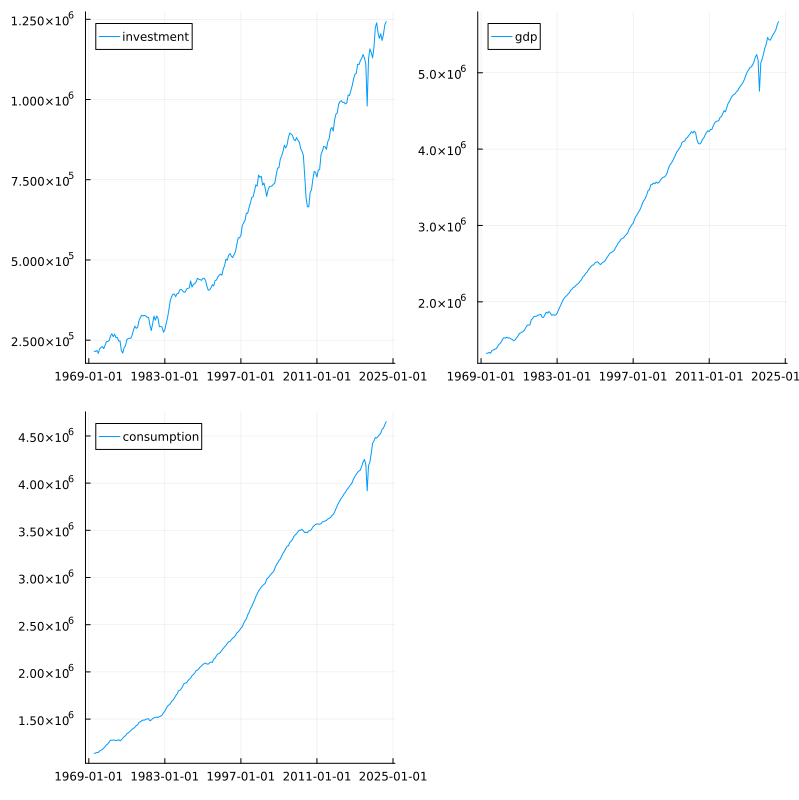

In [15]:
pl1 = plot(df[!,:period], df[!,:investment],label="investment")
pl2 = plot(df[!,:period], df[!,:gdp],label="gdp")
pl3 = plot(df[!,:period], df[!,:consumption],label="consumption")

plot(pl1,pl2,pl3;size=(800,800))


__Detrend all series.__

In [20]:
# detrend the consumption series 
series = df[!,:consumption]
trend = HP(series, 1600)
cycle = (series - trend)./trend
df[!,:consumption_trend] = trend
df[!,:consumption_cycle] = cycle;

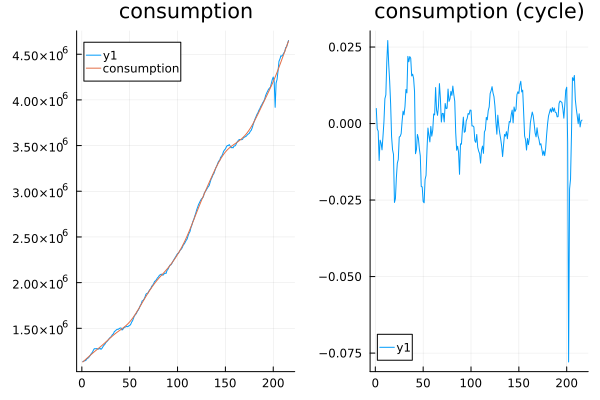

In [21]:
pl1 = plot(series, title="consumption")
plot!(pl1, trend, label="consumption")
pl2 = plot(cycle, title="consumption (cycle)")
plot(pl1, pl2)

In [22]:
# detrend gdp

series = df[!,:gdp]
trend = HP(series, 1600)
cycle = (series - trend)./trend
df[!,:gdp_trend] = trend
df[!,:gdp_cycle] = cycle;

In [23]:
# detrend the investment series 

series = df[!,:investment]
trend = HP(series, 1600)
cycle = (series - trend)./trend
df[!,:investment_trend] = trend
df[!,:investment_cycle] = cycle;

__Compute the correlations between the detrended series. Compute the ratios $\frac{\sigma(investment)}{\sigma(gdp)}$ and $\frac{\sigma (consumption)}{\sigma (gdp)}$. Compare with the RBC model and comment.__

In [43]:
# keep only the relevant part of the dataframe
relevant_df = df[:,[:gdp_cycle,:investment_cycle,:consumption_cycle]]

Row,gdp_cycle,investment_cycle,consumption_cycle
,Float64,Float64,Float64
1,0.00632641,-0.00186061,0.00492124
2,-0.00165798,-0.0167415,-0.00174059
3,-0.00178395,-0.0134543,-0.00245991
4,-0.0215434,-0.063543,-0.0120762
5,-0.00411494,-0.00995981,-0.0054254
6,-0.00775725,-0.000994378,-0.00638908
7,-0.00851934,-0.00060419,-0.00859888
8,-0.0149411,-0.0363655,-0.00421424
9,-0.00554043,0.000597618,0.00053205


In [50]:
# to compute statistics, we need to convert the dataframe into a matrix
mat = Matrix(relevant_df)


In [51]:
using Statistics: std, cov, cor

In [52]:
cor(mat)

3×3 Matrix{Float64}:
 1.0       0.909062  0.850059
 0.909062  1.0       0.650094
 0.850059  0.650094  1.0

In [56]:

std_y = std(relevant_df[:,:gdp_cycle])
std_i = std(relevant_df[:,:investment_cycle])
std_c = std(relevant_df[:,:consumption_cycle])

0.010668175144878967

In [59]:
println("σ(i)/σ(y): $(std_i/std_y)")
println("σ(c)/σ(y): $(std_c/std_y)")

σ(i)/σ(y): 3.3208282679766574
σ(c)/σ(y): 0.6950802322318318


# Small Open Economy

Start from the same rbc [model](rbc_fixed.mod).
Assume the representative agent can save $b^{\star}_t$ as foreign assets, remunerated at a constant interest rate $r^{\star}-1$.


__Write the new budget constraint for the representative household.__

À une date donnée t, le ménage épargne $b^{\star}_t$ sous forme de titres étrangers et reçoit le remboursement de son épargne
de la période précédente $b^{\star}_{t-1}$ plus les intérêts afférents $(r^{\star} − 1)b^{\star}_{t-1}$ . Par rapport au modèle de base, la contrainte
budgétaire en t devient donc :

$$c_t + i_t + b^ {\star}_t \leq w_t n_t + r_t k_{t-1} + r^ {\star} b^{\star}_{t-1}$$

and the lagrangian is:


$$\mathcal{L} = E_t \sum_{j=0}^\infty \beta^j\left[\log c_{t+j} + \chi \dfrac{(1-n_{t+j})^{1-\eta}}{1-\eta} \right.$$

$$+\lambda_{t+j} (w_{t+j}n_{t+j} + r_{t+j}k_{t+j-1} - c_{t+j}-k_{t+j} + (1-\delta)k_{t+j-1} + r^* b^*_{t+j-1} - b^*_{t+j} )\Bigg]$$



__Write the new optimality condition.__

Il faut ajouter au modèle la condition d’optimalité par rapport à $b^{\star}_t$ : le ménage représentatif choisit le niveau d’épargne
en titres étrangers qui maximise son utilité intertemporelle sous contrainte. On trouve :

$$ -\lambda_t + \beta E_t[\lambda_{t+1}r^*]=0$$
soit :
$$ \frac{1}{c_t}=\beta r^* E_t\left[\frac{1}{c_{t+1}} \right]$$


__What is the long run constraint on interest rate $r^{\star}$?__

À l’état stationnaire, cette équation implique $r^{\star}= \frac{1}{\beta}$ . Bien que $r^{\star}$ représente un taux d’intérêt décidé à l’étranger, $\frac{1}{\beta}$
est sa seule valeur compatible avec l’existence d’un équilibre de long terme dans le modèle. En effet, il ne peut pas y
avoir d’opportunité d’arbitrage à l’équilibre : tous les placements ont la même rentabilité.

__Update the modfile (set $\overline{b^{\star}}=0$)__

Pour mettre à jour le fichier .mod, il faut déclarer la nouvelle variable $b^{\star}$ et le nouveau paramètre $r^\star$? en lui donnant la
valeur $\frac{1}{\beta}$ . Il faut ajouter au modèle la condition d’optimalité ci-dessus et mettre à jour l’équation donnant l’équilibre
sur le marché des biens. En effet, cette équation est obtenue en équilibre général à partir de la contrainte budgétaire du
ménage. En petite économie ouverte, on a :

$$c_t + i_t + b^{\star}_t = w_t n_t + r_t k_{t-1} + r^{\star} b^{\star}_{t-1}$$

Or l’entreprise, supposée en concurrence parfaite, ne fait pas de profit. Donc $y_t = w_t n_t + r_t k_{t−1}$ et :

$$c_t + i_t + b^{\star}_t - r^{\star} b^{\star}_{t-1} = y_t$$

Ensuite, on remarque que le modèle statique ne détermine pas le niveau de $b^{\star}$ à l’état stationnaire ; on choisit de le fixer
à 0 de sorte que l’état stationnaire des autres variables du modèle ne soit pas affecté. On ajoute donc $b^{\star}=0$ dans le
bloc steady_state_model;.

__Print theoretical moments. Comment.__

On voit que Dynare ne parvient pas à calculer les moments (moyennes et variances) de certaines variables. De plus, les
irfs ne reviennent pas tous à 0.

__Simulate the model over 100 periods. Comment.__

Avec la commande check;, on voit que le modèle a une valeur propre de module égal à 1 [PAS DANS Dynare Julia]. Dans Dynare, ceci ne provoque
pas d’erreur par rapport aux conditions de Blanchard et Kahn mais est problématique : le modèle a une racine unitaire
et n’est donc pas stationnaire. En effet, il manque au modèle une force de rappel : si les ménages sont transitoirement
incités épargner plus sous forme de titres étrangers, rien ne les incite ensuite de façon endogène à baisser cette épargne
vers son niveau initial – la rémunération de cette épargne étant toujours la même.

__Assume the foreign interest rate depends on the amount of foreign assets__

$$r^{\star}=\frac{1}{\beta} + exp(-\kappa b^{\star}_t) - 1$$

__with $\kappa=0.01$. How do you interpret the equation for $r^{\star}_t$. How should you modify the model equations?__

Plus le ménage détient de titres étrangers, moins ceux-ci sont rémunérateurs. Inversement, plus le ménage est
endetté vis-à-vis de l'étranger $(b^{\star} < 0)$, plus les prêteurs étrangers vont exiger un taux d' intérêt élevé. On peut donc
interpréter le terme $exp(−\kappa b^{\star}_t ) − 1$ comme une prime de risque sur le taux d’intérêt étranger.
Pour mettre à jour le fichier .mod, il faut déclarer à présent $r^{\star}$ comme une variable et non un paramètre, déclarer sa
valeur à l’état stationnaire $r^{\star} = \frac{1}{β}$ dans le bloc steady_state_model; et enfin ajouter l’équation ci-dessus dans le bloc
model;.

Si on ne change pas les conditions d' Euler, cela revient à supposer que les consommateurs/le gouvernment n'internalisent pas l' effet de leur emprunt sur le taux d' intérêt.

__Update the modfile and comment on the generated moments. Do they depend on the choice of $\kappa$?__